In [3]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep

In [4]:
service = webdriver.ChromeService(executable_path='C:\chromedriver-win64\chromedriver.exe')
driver = webdriver.Chrome(service=service)

In [5]:
driver.get("https://twitter.com/login")

In [6]:
sleep(5)
username = driver.find_element(By.XPATH,"//input[@name='text']")
username.send_keys("danielxavieroei@gmail.com")
next_button = driver.find_element(By.XPATH,"//span[contains(text(),'Next')]")
next_button.click()

In [7]:
sleep(5)
password = driver.find_element(By.XPATH,"//input[@name='password']")
password.send_keys('enter your password')
log_in = driver.find_element(By.XPATH,"//span[contains(text(),'Log in')]")
log_in.click()

In [ ]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait

close_button = WebDriverWait(driver, 30).until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'div[aria-label="Close"]')))
close_button.click()

In [9]:
subject = "Seraphine"

sleep(3)
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(subject)
search_box.send_keys(Keys.ENTER)

sleep(3)
people = driver.find_element(By.XPATH,"//span[contains(text(),'People')]")
people.click()

In [14]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
search_results = WebDriverWait(driver, 30).until(EC.presence_of_all_elements_located((By.XPATH, "//*[@id=\"react-root\"]/div/div/div[2]/main/div/div/div/div/div/div[3]/section/div/div/div[1]/div/div/div/div/div[2]/div[1]/div[1]/div/div[1]/a/div/div[1]/span/span[1]")))

In [15]:
for result in search_results:
    if "Seraphine" in result.text:
        profile = result.find_element(By.XPATH, "//*[@id=\"react-root\"]/div/div/div[2]/main/div/div/div/div/div/div[3]/section/div/div/div[1]/div/div/div/div/div[2]/div[1]/div[1]/div/div[1]/a/div/div[1]/span/span[1]")  # Adjust the XPath as needed
        profile.click()
        break  

In [16]:
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep

UserTags = []
TimeStamps = []
Tweets = []
Replys = []
reTweets = []
Likes = []

max_tweets = 10  # Change this to your desired limit


extracted_tweets = set()

iteration = 0

while len(Tweets) < max_tweets:
    iteration += 1
    print(f"Iteration {iteration}")
    
    articles = driver.find_elements(By.XPATH, "//article[@data-testid='tweet']")
    new_tweets_extracted = 0  
    
    for article in articles:
        try:
            tweet_text = article.find_element(By.XPATH, ".//div[@data-testid='tweetText']").text
            print(f"Extracted tweet text: {tweet_text}")

            if tweet_text not in extracted_tweets:
                new_tweets_extracted += 1
                
                UserTag = article.find_element(By.XPATH, ".//div[@data-testid='User-Name']").text
                TimeStamp = article.find_element(By.XPATH, ".//time").get_attribute('datetime')
                Reply = article.find_element(By.XPATH, ".//div[@data-testid='reply']").text
                reTweet = article.find_element(By.XPATH, ".//div[@data-testid='retweet']").text
                Like = article.find_element(By.XPATH, ".//div[@data-testid='like']").text
                
                UserTags.append(UserTag)
                TimeStamps.append(TimeStamp)
                Tweets.append(tweet_text)
                Replys.append(Reply)
                reTweets.append(reTweet)
                Likes.append(Like)
                
                extracted_tweets.add(tweet_text)
        except NoSuchElementException:
            print("Element not found in a tweet. Skipping...")
            continue

    if new_tweets_extracted == 0:
        break

    last_tweet = articles[-1]
    driver.execute_script('arguments[0].scrollIntoView();', last_tweet)
    sleep(8)

print(f"Total tweets extracted: {len(Tweets)}")

Iteration 1
Extracted tweet text: until we meet again
Extracted tweet text: i think it’s time to take a break and explore something new. i gotta live life so i have something to sing about 
Extracted tweet text: This game is a treasure for RPG fans
Element not found in a tweet. Skipping...
Iteration 2
Extracted tweet text: until we meet again
Extracted tweet text: i think it’s time to take a break and explore something new. i gotta live life so i have something to sing about 
Extracted tweet text: This game is a treasure for RPG fans
Element not found in a tweet. Skipping...
Extracted tweet text: I fell in love with Seraphine after the clip, so this dtiys prize was just a pleasure for me

for 
@Ashyrou
 

#Seraphine #KDA
Extracted tweet text: i’m realizing that making music isn’t just for other people, it’s also for yourself
Extracted tweet text: working on this EP with K/DA really inspired me. everyone had a reason to sing, and it made me want to find mine
Iteration 3
Extracted tweet 

In [17]:
import pandas as pd

df = pd.DataFrame(zip(UserTags,TimeStamps,Tweets,Replys,reTweets,Likes)
                  ,columns=['UserTags','TimeStamps','Tweets','Replys','reTweets','Likes'])

df

,UserTags,TimeStamps,Tweets,Replys,reTweets,Likes
0,"Seraphine\n@seradotwav\n·\nNov 8, 2020",2020-11-08T03:12:00.000Z,until we meet again,"1,303","4,058",28.3K
1,"Seraphine\n@seradotwav\n·\nNov 8, 2020",2020-11-07T23:01:00.000Z,i think it’s time to take a break and explore ...,"1,095","2,575",22.1K
2,"linachuu MOVED\n@linachuuuuu\n·\nNov 7, 2020",2020-11-06T19:32:57.000Z,"I fell in love with Seraphine after the clip, ...",32,655,"7,303"
3,"Seraphine\n@seradotwav\n·\nNov 7, 2020",2020-11-06T17:50:00.000Z,i’m realizing that making music isn’t just for...,165,557,11K
4,"Seraphine\n@seradotwav\n·\nNov 7, 2020",2020-11-06T17:46:00.000Z,working on this EP with K/DA really inspired m...,72,278,"7,559"
5,"Seraphine\n@seradotwav\n·\nNov 7, 2020",2020-11-06T17:19:49.000Z,ALL OUT is FINALLY OUT!!! we really put our he...,161,908,14.2K
6,"Seraphine\n@seradotwav\n·\nNov 6, 2020",2020-11-05T23:30:06.000Z,i still don’t have the right words to describe...,231,857,"8,844"
7,"Seraphine\n@seradotwav\n·\nNov 6, 2020",2020-11-05T23:30:07.000Z,i know now more than ever that i always want t...,24,104,"4,801"
8,"Seraphine\n@seradotwav\n·\nNov 6, 2020",2020-11-05T23:30:07.000Z,the past few months have been a wild adventure...,127,163,"5,004"
9,"Seraphine\n@seradotwav\n·\nNov 6, 2020",2020-11-05T18:17:00.000Z,listen to the ALL OUT EP tomorrow! it was a la...,148,601,10.1K


In [18]:
df.to_excel("twitterscraping2020_v1.xlsx", index=False)

In [24]:
df2 = pd.DataFrame(Tweets, columns=['Tweets'])
df2

,Tweets
0,until we meet again
1,i think it’s time to take a break and explore ...
2,"I fell in love with Seraphine after the clip, ..."
3,i’m realizing that making music isn’t just for...
4,working on this EP with K/DA really inspired m...
5,ALL OUT is FINALLY OUT!!! we really put our he...
6,i still don’t have the right words to describe...
7,i know now more than ever that i always want t...
8,the past few months have been a wild adventure...
9,listen to the ALL OUT EP tomorrow! it was a la...


In [30]:
#for further analysis

import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize

def split_sentences(text):
    return sent_tokenize(text)

sentences = [split_sentences(tweet) for tweet in Tweets]

flattened_sentences = [sentence for sublist in sentences for sentence in sublist]

df = pd.DataFrame(flattened_sentences, columns=['Sentences'])

print(df)

                                            Sentences
0                                 until we meet again
1   i think it’s time to take a break and explore ...
2   i gotta live life so i have something to sing ...
3   I fell in love with Seraphine after the clip, ...
4   i’m realizing that making music isn’t just for...
5    working on this EP with K/DA really inspired me.
6   everyone had a reason to sing, and it made me ...
7                           ALL OUT is FINALLY OUT!!!
8   we really put our hearts into this, hope you e...
9   i still don’t have the right words to describe...
10  i started posting music from my bedroom this s...
11  i know now more than ever that i always want t...
12            music is the connection between people.
13  when you hear yourself in others’ voices, you ...
14                    to love yourself a little more.
15     i learned that from K/DA, and from all of you.
16  the past few months have been a wild adventure...
17  but more than anything, 

In [31]:
all_sentences = df['Sentences']

all_words = []

for sentence in all_sentences:
    words = sentence.split()
    all_words.extend(words)

print(all_words)

['until', 'we', 'meet', 'again', 'i', 'think', 'it’s', 'time', 'to', 'take', 'a', 'break', 'and', 'explore', 'something', 'new.', 'i', 'gotta', 'live', 'life', 'so', 'i', 'have', 'something', 'to', 'sing', 'about', 'I', 'fell', 'in', 'love', 'with', 'Seraphine', 'after', 'the', 'clip,', 'so', 'this', 'dtiys', 'prize', 'was', 'just', 'a', 'pleasure', 'for', 'me', 'for', '@Ashyrou', '#Seraphine', '#KDA', 'i’m', 'realizing', 'that', 'making', 'music', 'isn’t', 'just', 'for', 'other', 'people,', 'it’s', 'also', 'for', 'yourself', 'working', 'on', 'this', 'EP', 'with', 'K/DA', 'really', 'inspired', 'me.', 'everyone', 'had', 'a', 'reason', 'to', 'sing,', 'and', 'it', 'made', 'me', 'want', 'to', 'find', 'mine', 'ALL', 'OUT', 'is', 'FINALLY', 'OUT!!!', 'we', 'really', 'put', 'our', 'hearts', 'into', 'this,', 'hope', 'you', 'enjoy', 'i', 'still', 'don’t', 'have', 'the', 'right', 'words', 'to', 'describe', 'the', 'incredible', 'journey', 'these', 'last', 'few', 'months', 'have', 'been.', 'i', 's

In [33]:
import re
all_words = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in all_words]

all_words = [word for word in all_words if word != '']

print(all_words)

['until', 'we', 'meet', 'again', 'i', 'think', 'its', 'time', 'to', 'take', 'a', 'break', 'and', 'explore', 'something', 'new', 'i', 'gotta', 'live', 'life', 'so', 'i', 'have', 'something', 'to', 'sing', 'about', 'I', 'fell', 'in', 'love', 'with', 'Seraphine', 'after', 'the', 'clip', 'so', 'this', 'dtiys', 'prize', 'was', 'just', 'a', 'pleasure', 'for', 'me', 'for', 'Ashyrou', 'Seraphine', 'KDA', 'im', 'realizing', 'that', 'making', 'music', 'isnt', 'just', 'for', 'other', 'people', 'its', 'also', 'for', 'yourself', 'working', 'on', 'this', 'EP', 'with', 'KDA', 'really', 'inspired', 'me', 'everyone', 'had', 'a', 'reason', 'to', 'sing', 'and', 'it', 'made', 'me', 'want', 'to', 'find', 'mine', 'ALL', 'OUT', 'is', 'FINALLY', 'OUT', 'we', 'really', 'put', 'our', 'hearts', 'into', 'this', 'hope', 'you', 'enjoy', 'i', 'still', 'dont', 'have', 'the', 'right', 'words', 'to', 'describe', 'the', 'incredible', 'journey', 'these', 'last', 'few', 'months', 'have', 'been', 'i', 'started', 'posting',

In [35]:
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem = []
for word in all_words:
    stem.append(s_stemmer.stem(word))

print(stem)

['until', 'we', 'meet', 'again', 'i', 'think', 'it', 'time', 'to', 'take', 'a', 'break', 'and', 'explor', 'someth', 'new', 'i', 'gotta', 'live', 'life', 'so', 'i', 'have', 'someth', 'to', 'sing', 'about', 'i', 'fell', 'in', 'love', 'with', 'seraphin', 'after', 'the', 'clip', 'so', 'this', 'dtiy', 'prize', 'was', 'just', 'a', 'pleasur', 'for', 'me', 'for', 'ashyrou', 'seraphin', 'kda', 'im', 'realiz', 'that', 'make', 'music', 'isnt', 'just', 'for', 'other', 'peopl', 'it', 'also', 'for', 'yourself', 'work', 'on', 'this', 'ep', 'with', 'kda', 'realli', 'inspir', 'me', 'everyon', 'had', 'a', 'reason', 'to', 'sing', 'and', 'it', 'made', 'me', 'want', 'to', 'find', 'mine', 'all', 'out', 'is', 'final', 'out', 'we', 'realli', 'put', 'our', 'heart', 'into', 'this', 'hope', 'you', 'enjoy', 'i', 'still', 'dont', 'have', 'the', 'right', 'word', 'to', 'describ', 'the', 'incred', 'journey', 'these', 'last', 'few', 'month', 'have', 'been', 'i', 'start', 'post', 'music', 'from', 'my', 'bedroom', 'this

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

stem2 = []

for word in stem:
    if word not in stop_words:
        stem2.append(word)

stem2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['meet',
 'think',
 'time',
 'take',
 'break',
 'explor',
 'someth',
 'new',
 'gotta',
 'live',
 'life',
 'someth',
 'sing',
 'fell',
 'love',
 'seraphin',
 'clip',
 'dtiy',
 'prize',
 'pleasur',
 'ashyrou',
 'seraphin',
 'kda',
 'im',
 'realiz',
 'make',
 'music',
 'isnt',
 'peopl',
 'also',
 'work',
 'ep',
 'kda',
 'realli',
 'inspir',
 'everyon',
 'reason',
 'sing',
 'made',
 'want',
 'find',
 'mine',
 'final',
 'realli',
 'put',
 'heart',
 'hope',
 'enjoy',
 'still',
 'dont',
 'right',
 'word',
 'describ',
 'incred',
 'journey',
 'last',
 'month',
 'start',
 'post',
 'music',
 'bedroom',
 'summer',
 'know',
 'would',
 'lead',
 'know',
 'ever',
 'alway',
 'want',
 'make',
 'music',
 'music',
 'connect',
 'peopl',
 'hear',
 'voic',
 'learn',
 'love',
 'better',
 'love',
 'littl',
 'learn',
 'kda',
 'past',
 'month',
 'wild',
 'adventur',
 'turmoil',
 'joy',
 'experi',
 'beyond',
 'imagin',
 'anyth',
 'im',
 'glad',
 'got',
 'im',
 'grate',
 'got',
 'meet',
 'listen',
 'ep',
 'tomorro

In [40]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

In [42]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist(stem2)

print(freqdoctor)

<FreqDist with 93 samples and 121 outcomes>


In [43]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

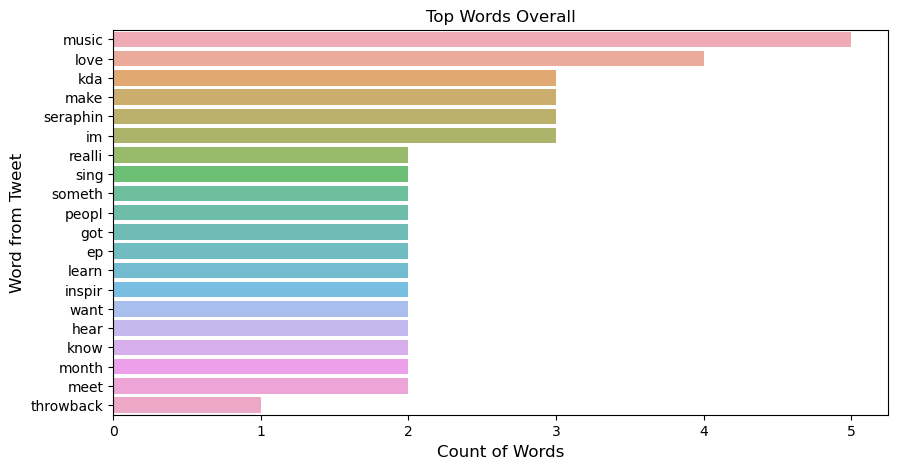

In [45]:
#This is a simple plot that shows the top 20 words being used

df = df.sort_values(ascending=False)

df = df[:20]

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [47]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [48]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [50]:
str1 = " " 
stem2 = str1.join(all_words)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

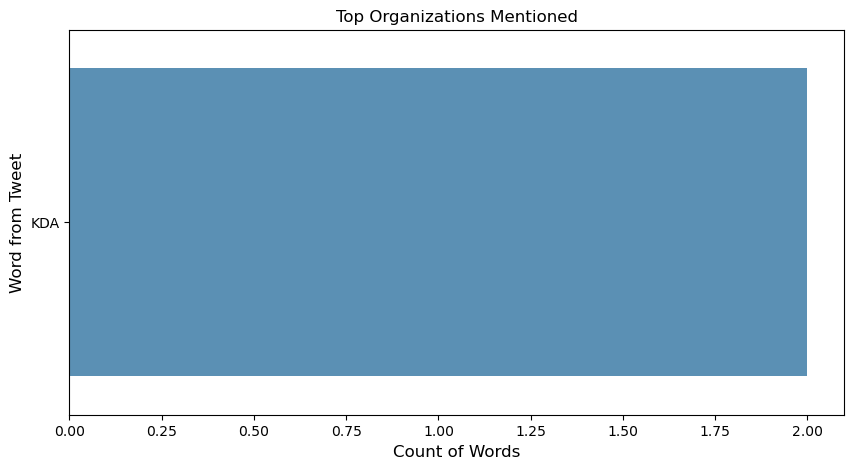

In [52]:
df = df7[:20] 

plt.figure(figsize=(10, 5))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [53]:
str1 = " " 
stem2 = str1.join(all_words)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

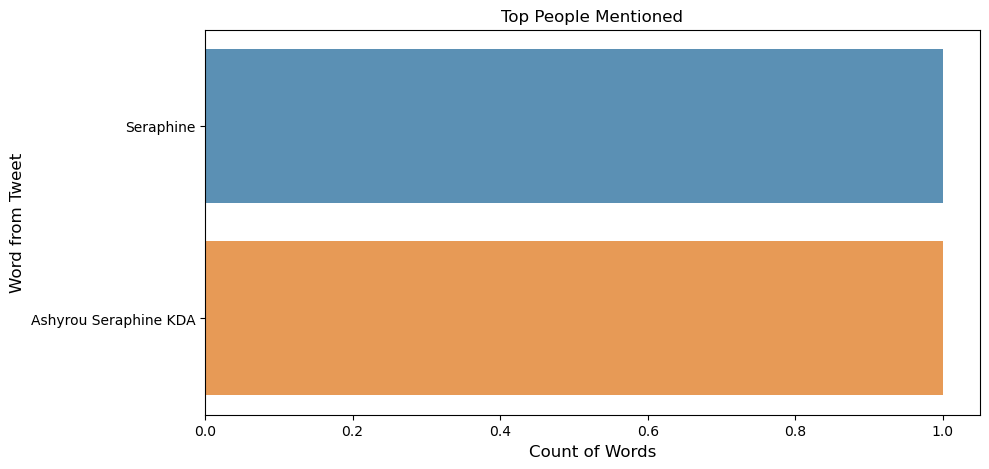

In [55]:
df = df11[:20]

plt.figure(figsize=(10,5))
sns.barplot(x=df.values, y=df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()